In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
np.random.seed(1)

## Generating some data

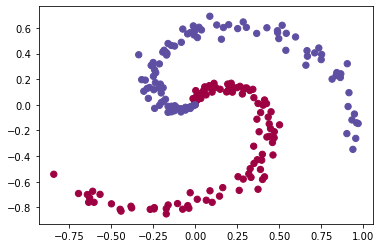

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros((N*K,), dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
X.shape

(200, 2)

In [10]:
y.shape[0]

200

In [5]:
shape_X = X.shape
shape_Y = y.shape
m = shape_X[0]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (200, 2)
The shape of Y is: (200,)
I have m = 200 training examples!


## SIMPLE LOGISTIC REGRESSION

In [6]:
# Train the logistic regression classifier
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

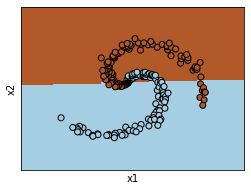

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h)
)
Z = clf.predict(
    np.c_[
        xx.ravel(), 
        yy.ravel()
    ]
)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.pcolormesh(
    xx, 
    yy, 
    Z, 
    shading = 'auto', 
    vmin = Z.min(), 
    vmax = Z.max(), 
    cmap = plt.cm.Paired
)

# Plot also the training points
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=y, 
    edgecolors='k', 
    cmap=plt.cm.Paired
)
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# Print accuracy
LR_predictions = clf.predict(X)
correct = LR_predictions == y
float(np.sum(correct)/y.size) * 100

68.0

## Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### - Defining the neural network structure ####

**Exercise**: Define three variables:

- n_x: the size of the input layer
- n_h: the size of the hidden layer (set this to 4) 
- n_y: the size of the output lay

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [79]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape(number of examples, input size)
    Y -- labels of shape(number of examples, output size)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x, n_h, n_y

In [82]:
Y = y.reshape(1, y.shape[0])
Y.shape

(1, 200)

In [83]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]], dtype=uint8)

In [85]:
X = X.T

In [86]:
X.shape

(2, 200)

In [89]:
layer_sizes(X, Y)

(2, 4, 1)

### - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [16]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of hidden layer
    n_y -- size of the output layer
    
    Returns:
    W1 -- weight matrix of shape (n_h, n_x)
    b1 -- bias vector of shape (n_h, 1)
    W2 -- weight matrix of shape (n_y, n_h)
    b2 -- bias vector of shape (n_y, 1)
    """
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    return {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

In [17]:
initialize_parameters(2,4,1)

{'W1': array([[-0.00400878,  0.00824006],
        [-0.00562305,  0.01954878],
        [-0.01331952, -0.01760689],
        [-0.01650721, -0.00890556]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-1.1191154 ,  1.9560789 , -0.3264995 , -1.34267579]]),
 'b2': array([[0.]])}

### - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [18]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Argument:
    z -- A scalar or numpy array of any size
    
    Return:
    s -- sigmoid(z)
    """
    s = 1/(1 + np.exp(-z))
    return s

In [21]:
sigmoid(np.array([-10, 0, 2, 10]))

array([4.53978687e-05, 5.00000000e-01, 8.80797078e-01, 9.99954602e-01])

### - The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [34]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- containing parameters
    
    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters.get('W1')
    b1 = parameters.get('b1')
    W2 = parameters.get('W2')
    b2 = parameters.get('b2')
    
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache

In [35]:
X_assess = np.random.randn(2, 3) * 0.01
parameters = initialize_parameters(2, 4, 1)

In [36]:
A2, cache = forward_propagation(X_assess, parameters)

In [37]:
A2.shape

(1, 3)

In [38]:
A2

array([[0.50001847, 0.50001361, 0.49998073]])

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [94]:
def compute_cost(A2, Y, parameters):
    """
    Compute the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- the sigmoid output of the second activation, of shape(1, number of examples)
    Y -- true, labels vector of shape(1, number of examples)
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m = Y.shape[1]
#     logprobs = - (np.multiply(Y, np.log(A2)) + np.multiply(1 - Y, np.log(1 - A2)))
#     cost = np.sum(logprobs)/m
#     print(cost)
    cost = -(np.dot(Y, np.log(A2).T) + np.dot(1 - Y, np.log(1 - A2).T))/m
#     print(cost)
    cost = float(np.squeeze(cost))
    return cost

In [41]:
parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
 'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}

In [42]:
A2 = np.array([[ 0.5002307 ,  0.49985831,  0.50023963]])

In [47]:
Y_assess = np.array([[ True, False, False]], dtype=bool)

In [66]:
compute_cost(A2, Y_assess, parameters)

[[0.69305876]]


0.6930587610394646

Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [76]:
def backward_propagation(parameters, cache, X, Y):
    """
    Arguments:
    parameters -- dictionary
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    X -- input data of shape (2, number of examples)
    Y -- true, labels vector of shape (1, number of examples)
    """
    m = Y.shape[1]
    
    W1 = parameters.get('W1')
    W2 = parameters.get('W2')
    
    A1 = cache.get('A1')
    A2 = cache.get('A2')
    
    # Backward propagation
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims = True)/m
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    return {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

In [68]:
parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
 'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}

In [69]:
cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
        [-0.05225116,  0.02725659, -0.02646251],
        [-0.02009721,  0.0036869 ,  0.02883756],
        [ 0.02152675, -0.01385234,  0.02599885]]),
 'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
 'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
        [-0.05229879,  0.02726335, -0.02646869],
        [-0.02009991,  0.00368692,  0.02884556],
        [ 0.02153007, -0.01385322,  0.02600471]]),
 'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}

In [71]:
X_assess = np.array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]])

In [72]:
Y_assess = np.array([[ True, False,  True]], dtype=bool)

In [77]:
backward_propagation(parameters, cache, X_assess, Y_assess)

{'dW1': array([[ 0.00301023, -0.00747267],
        [ 0.00257968, -0.00641288],
        [-0.00156892,  0.003893  ],
        [-0.00652037,  0.01618243]]),
 'db1': array([[ 0.00176201],
        [ 0.00150995],
        [-0.00091736],
        [-0.00381422]]),
 'dW2': array([[ 0.00078841,  0.01765429, -0.00084166, -0.01022527]]),
 'db2': array([[-0.16655712]])}

**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



In [78]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    W1 = parameters.get('W1')
    b1 = parameters.get('b1')
    W2 = parameters.get('W2')
    b2 = parameters.get('b2')
    
    dW1 = grads.get('dW1')
    db1 = grads.get('db1')
    dW2 = grads.get('dW2')
    db2 = grads.get('db2')
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

###  - Integrate in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [139]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- number of iterations in gradient desecent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    returns:
    parameters -- parameters learnt by model. They can then be used to predict
    """
    n_x, _, n_y = layer_sizes(X, Y)
    
    # initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []
    # loop gradient descent
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function
        cost = compute_cost(A2, Y, parameters)
        
        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameters update
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        # print cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print(f'Cost={cost} after iteration={i}')
        costs.append(cost)
    return parameters, costs

In [140]:
parameters, costs = nn_model(X, Y, 4, num_iterations = 10000, print_cost=True)

Cost=0.6963694602649599 after iteration=0
Cost=0.036604164134649245 after iteration=1000
Cost=0.025065262634810646 after iteration=2000
Cost=0.021263184604671012 after iteration=3000
Cost=0.019276630861397588 after iteration=4000
Cost=0.017988301956720243 after iteration=5000
Cost=0.017054632370907697 after iteration=6000
Cost=0.016331056639448203 after iteration=7000
Cost=0.01574503402155993 after iteration=8000
Cost=0.015255617016731069 after iteration=9000


In [144]:
np.squeeze(costs).shape

(10000,)

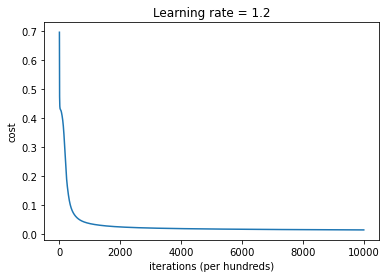

In [141]:
_costs = np.squeeze(costs)
plt.plot(_costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = 1.2")
plt.show()

### Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

In [97]:
def predict(parameters, X):
    """
    Arguments:
    parameters -- containing learned parameters
    X -- input data of size (n_x, m)
    
    returns:
    predictions -- vector of predictions of our model
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2 >= 0.5, 1, 0)
    
    return predictions

In [99]:
predictions = predict(parameters, X)

In [129]:
def measure_accuracy(prediction, Y):
    correct = prediction == Y
    return float(np.sum(correct)/Y.shape[1]) * 100

In [130]:
measure_accuracy(predictions, Y)

99.5

In [135]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), 
        np.arange(y_min, y_max, h)
    )
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

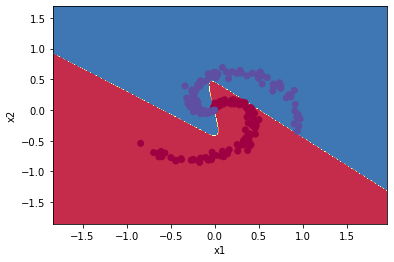

In [136]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

Accuracy for 1 hidden units: 77.0 %
Accuracy for 2 hidden units: 93.0 %
Accuracy for 3 hidden units: 99.5 %
Accuracy for 4 hidden units: 99.5 %
Accuracy for 5 hidden units: 99.5 %
Accuracy for 20 hidden units: 99.5 %
Accuracy for 50 hidden units: 99.0 %


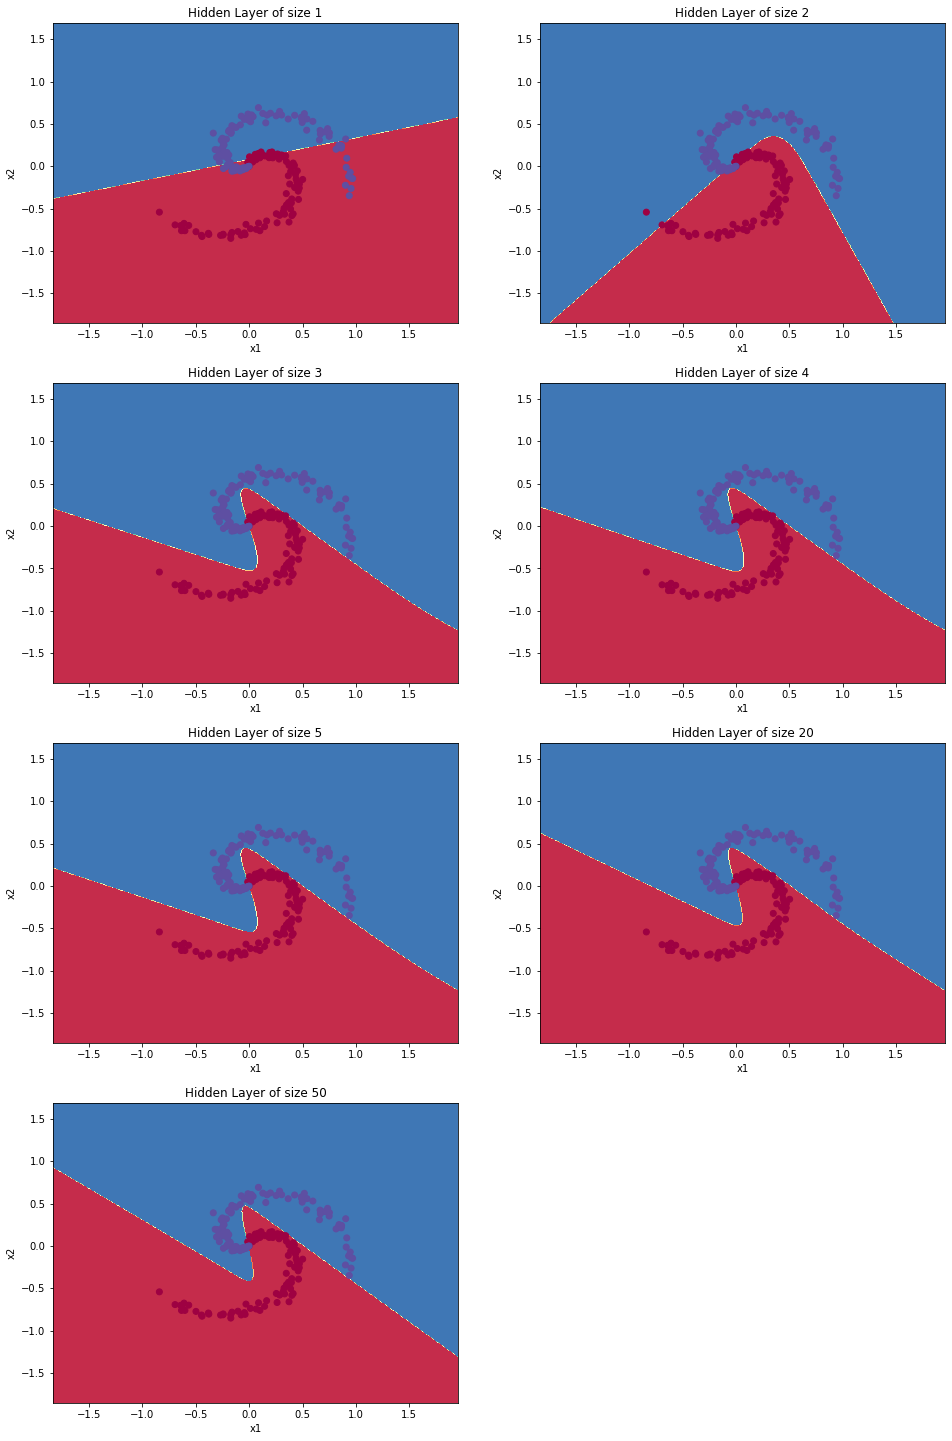

In [131]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = measure_accuracy(predictions, Y)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))